In [2]:
import warnings
warnings.filterwarnings('ignore')

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
import numpy as np
import pandas as pd

In [3]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


***Normalize data***

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
# l2 regularization gives better results
lr = LogisticRegression(penalty='l2', C=10, random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(C=10, random_state=0)

In [8]:
from sklearn import metrics

In [9]:
print ("Train - Accuracy :", metrics.accuracy_score(y_train, lr.predict(X_train)))

Train - Accuracy : 0.9809523809523809


In [10]:
print ("Train - Confusion matrix :",metrics.confusion_matrix(y_train, lr.predict(X_train)))

Train - Confusion matrix : [[34  0  0]
 [ 0 31  1]
 [ 0  1 38]]


In [11]:
print ("Train - classification report :", metrics.classification_report(y_train, lr.predict(X_train)))

Train - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.97      0.97        32
           2       0.97      0.97      0.97        39

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [12]:
print("Test - Accuracy :", metrics.accuracy_score(y_test, lr.predict(X_test)))

Test - Accuracy : 0.9777777777777777


In [13]:
print ("Test - Confusion matrix :",metrics.confusion_matrix(y_test, lr.predict(X_test)))

Test - Confusion matrix : [[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


In [14]:
print ("Test - classification report :", metrics.classification_report(y_test, lr.predict(X_test)))

Test - classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



***Logistic Regression Diagnostics***

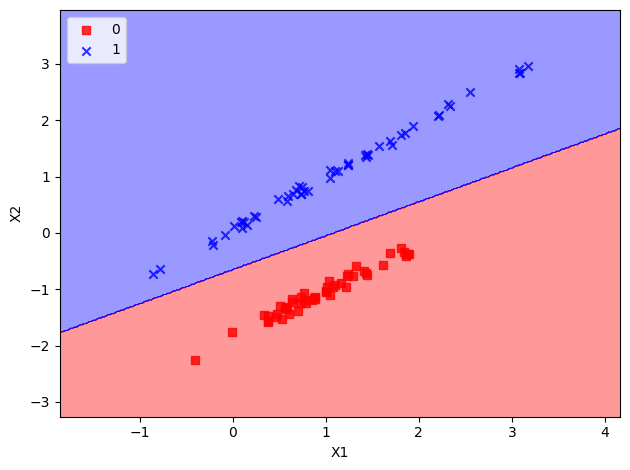

In [16]:
# Let's use sklearn make_classification function to create some test data.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)


# build a simple logistic regression model
clf = LogisticRegression().fit(X, y)

def plot_decision_regions(X, y, classifier):
    
    h = .02  # step size in the mesh
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                           np.arange(x2_min, x2_max, h))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)
        
# Plot the decision boundary
plot_decision_regions(X, y, classifier=clf)
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
data = pd.read_csv('data/LR_NonLinear.csv')
data

,x1,x2,class
0,-0.023733,0.624560,1
1,-0.167742,0.609940,1
2,-0.288710,0.617250,1
3,-0.450000,0.427190,1
4,-0.588250,0.390640,1
...,...,...,...
231,-0.720620,0.538740,0
232,-0.593890,0.494880,0
233,-0.484450,0.999270,0
234,-0.006336,0.999270,0


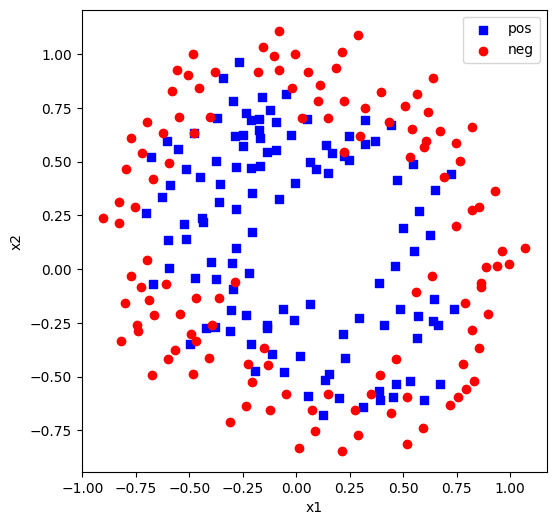

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'data' is a DataFrame with columns 'class', 'x1', and 'x2'

pos = data['class'] == 1
neg = data['class'] == 0
x1 = data['x1']
x2 = data['x2']

def draw_plot():
    plt.figure(figsize=(6, 6))
    plt.scatter(np.extract(pos, x1), 
                np.extract(pos, x2), 
                c='b', marker='s', label='pos')
    plt.scatter(np.extract(neg, x1), 
                np.extract(neg, x2), 
                c='r', marker='o', label='neg')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # Commenting out the line below might help if it's causing issues
    # plt.axes().set_aspect('equal', 'datalim')
    plt.legend()

draw_plot()
plt.show()

In [22]:
order_no = 6

# map the variable 1 & 2 to its higher order polynomial
def map_features(variable_1, variable_2, order=order_no):
    assert order >= 1
    def iter():
        for i in range(1, order + 1):
            for j in range(i + 1):
                yield np.power(variable_1, i - j) * np.power(variable_2, j)
    return np.vstack(iter())
   
out = map_features(data['x1'], data['x2'], order=order_no)
X = out.transpose()
y = data['class']

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# function to draw classifier line
def draw_boundary(classifier):
    dim = np.linspace(-0.8, 1.1, 100)
    dx, dy = np.meshgrid(dim, dim)
    v = map_features(dx.flatten(), dy.flatten(), order=order_no)
    z = (np.dot(classifier.coef_, v) + classifier.intercept_).reshape(100, 100)
    plt.contour(dx, dy, z, levels=[0], colors=['r'])

Train Accuracy for C=0.01:  0.6848484848484848
Test Accuracy for C=0.01:  0.704225352112676
Train Accuracy for C=1:  0.8363636363636363
Test Accuracy for C=1:  0.8028169014084507
Train Accuracy for C=10000:  0.8545454545454545
Test Accuracy for C=10000:  0.8028169014084507


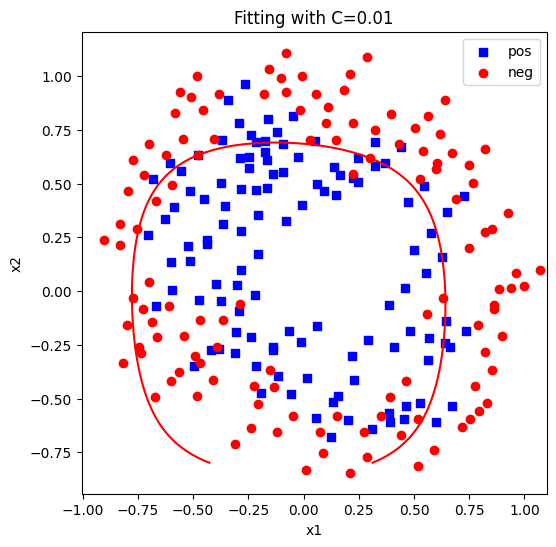

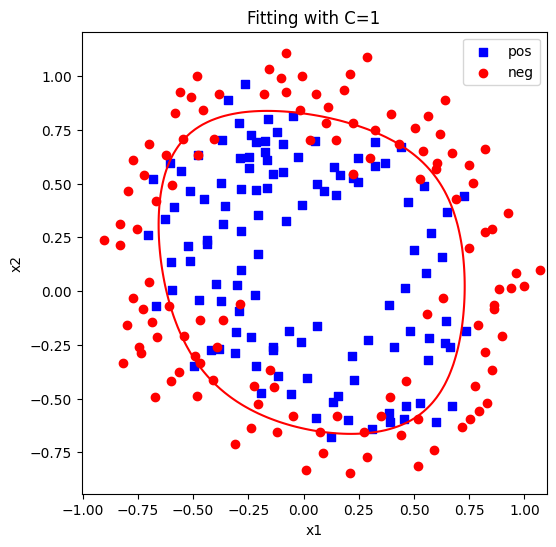

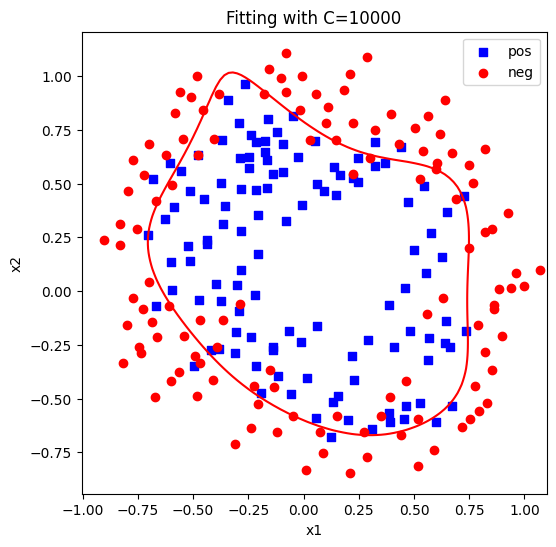

In [24]:
# fit with c = 0.01   
clf = LogisticRegression(C=0.01).fit(X_train, y_train)
print ('Train Accuracy for C=0.01: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=0.01: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=0.01')
draw_boundary(clf)
plt.legend(); 

# fit with c = 1    
clf = LogisticRegression(C=1).fit(X_train, y_train)
print ('Train Accuracy for C=1: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=1: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=1')
draw_boundary(clf)
plt.legend();

# fit with c = 10000    
clf = LogisticRegression(C=10000).fit(X_train, y_train)
print ('Train Accuracy for C=10000: ', clf.score(X_train, y_train))
print ('Test Accuracy for C=10000: ', clf.score(X_test, y_test))
draw_plot()
plt.title('Fitting with C=10000')
draw_boundary(clf)
plt.legend();